# 基本图表的绘制及应用场景

In [2]:
# 用于在jupyter中进行绘图
%matplotlib notebook
# %matplotlib inline

## 1. Matplotlib架构

In [ ]:
# Backend

import matplotlib as mpl
mpl.get_backend()

## 2. 基本图表的绘制

In [3]:
import matplotlib.pyplot as plt

### 使用[matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html)直接绘制

<IPython.core.display.Javascript object>


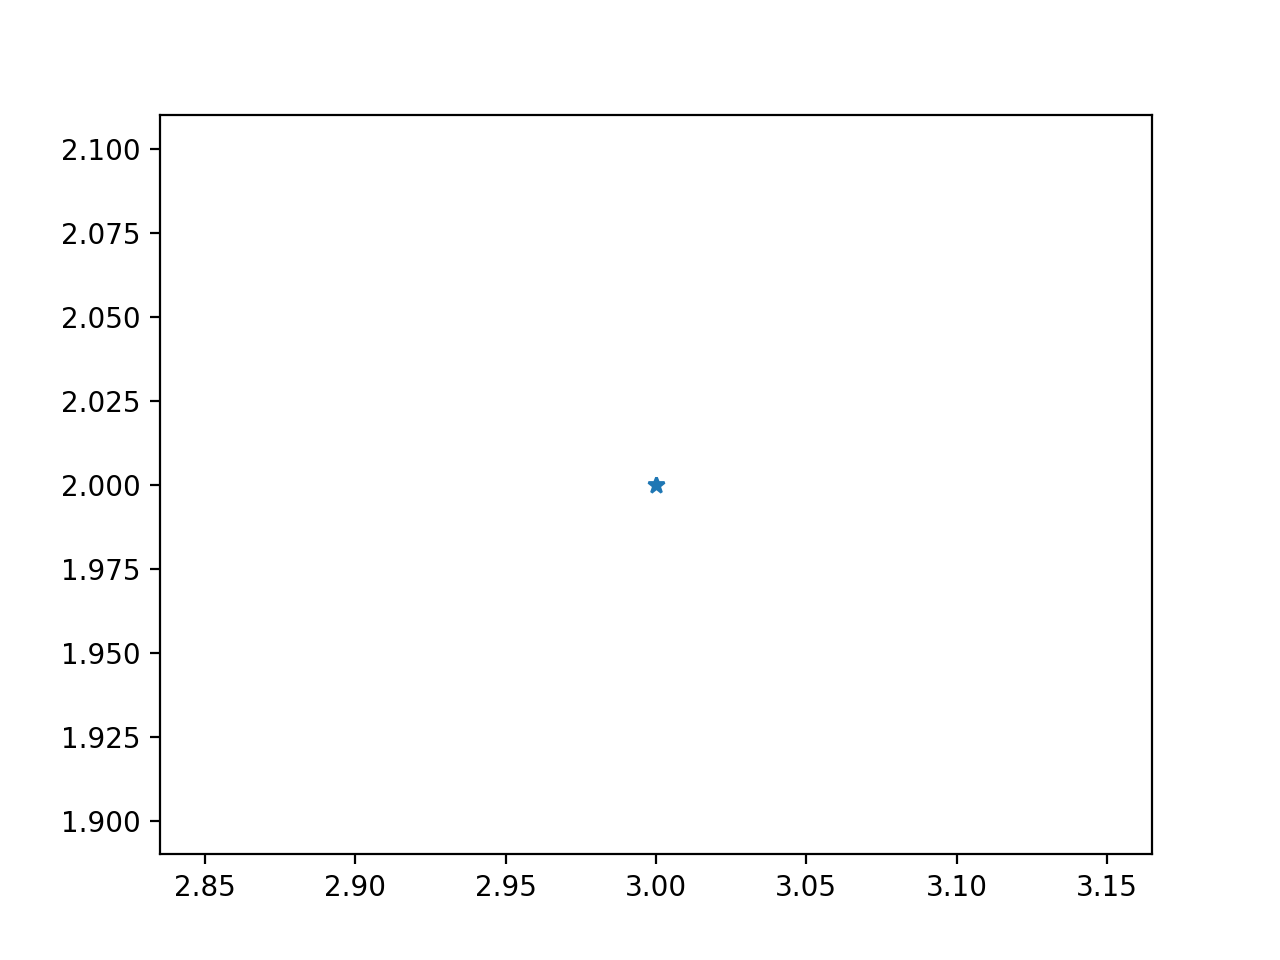

In [4]:
plt.plot(3, 2, '*')

### 使用scripting 层绘制 (使用较少) 

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3, 2, '.')
canvas.print_png('test.png')

### [gca](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca)获取当前坐标轴对象

In [ ]:
plt.figure()
plt.plot(3, 2, 'o')
# 获取当前坐标轴
ax = plt.gca()
# 设置坐标轴范围
ax.axis([0, 6, 0, 10])

In [ ]:
# matplot 会自动用颜色区分不同的数据
plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, '*')
plt.plot(2.5, 2.5, '*')

## 3. [散点图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.scatter)


    plt.scatter(x,y,c=T,s=25,alpha=0.4,marker='o')
        #T:散点的颜色
        #s：散点的大小
        #alpha:是透明程度
        #marker：散点的形状
   ### color
b---blue   c---cyan  g---green    k----black
m---magenta r---red  w---white    y----yellow

In [ ]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()
plt.scatter(x, y)

In [ ]:
# 改变颜色及大小

import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x
colors = ['red'] * (len(x) - 1)
colors.append('green')

plt.figure()
# s: size  也可以放一个list
plt.scatter(x, y, s=100, c=colors)

In [ ]:
# 使用zip合并两个列表为一个新列表
# 新列表中的每个元素为对应位置上的元组
l1 = list(range(1, 6))
l2 = list(range(6, 11))
zip_generator = zip(l1, l2)
tuple_list = list(zip_generator)
print(type(zip_generator))
print(list(tuple_list))

In [ ]:
# 使用*进行对元组列表解包
x, y = zip(*tuple_list)
print(x)
print(y)

In [ ]:
plt.figure()
plt.scatter(x[:2], y[:2], c='red', label='samples 1')
plt.scatter(x[2:], y[2:], c='blue', label='samples 2')
# 指定label后才有图例 Legend

# 添加坐标标签，标题
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Scatter Plot Example')

# 添加图例
# plt.legend()
# 4: 右下角   frameon 边框       loc也可以赋值为 'best'
plt.legend(loc=4, frameon=True, title='Legend')

## 4. [线图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.plot)

In [ ]:
import numpy as np

linear_data = np.arange(1, 9)
quadratic_data = linear_data ** 2

plt.figure()
# 线性图不需要指定x，默认使用索引号。
plt.plot(linear_data, '-o', quadratic_data, '-o')

# 注意，这里我们只指定了y轴数据，x轴的数据是matplotlib自动生成的

In [ ]:
plt.plot([22, 44, 66], '--r')

In [ ]:
# 添加坐标轴标签及图例
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Line Chart Title')
plt.legend(['legend1', 'legend2', 'legend3'])

In [ ]:
# 填充两个line间的区域   alpha:透明度   range(len(linear_data)) x轴
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data,
                      facecolor='green',
                      alpha=0.25)

In [ ]:
# 绘制横轴为时间的线图
plt.figure()
# 数据类型为时间类型：dtype='datetime64[D]'
observation_dates = np.arange('2017-10-11', '2017-10-19', dtype='datetime64[D]')
observation_dates
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')
# 横轴并不是我们想要的结果

In [ ]:
# 借助pandas绘制横轴为时间的线图
import pandas as pd
plt.figure()
observation_dates = np.arange('2017-10-11', '2017-10-19', dtype='datetime64[D]')
# map(函数，数据)
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')


In [ ]:
# plt.xticks(rotation='45')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    # 刻度字体转换45度  如上图
    item.set_rotation(45)

In [ ]:
# 调整边界距离
plt.subplots_adjust(bottom=0.25)

In [ ]:
# 对于学术制图，可在标题中包含latex语法
ax = plt.gca()
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$)')

## 5. [柱状图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20bar#matplotlib.pyplot.bar)

In [ ]:
plt.figure()
x_vals = list(range(len(linear_data)))
plt.bar(x_vals, linear_data, width=0.3)

In [ ]:
# group bar chart   分组柱状图
# 同一副图中添加新的柱状图
# 注意，为了不覆盖第一个柱状图，需要对x轴做偏移
x_vals2 = [item + 0.3 for item in x_vals]
plt.bar(x_vals2, quadratic_data, width=0.3)
    

In [ ]:
# stack bar chart    堆叠柱状图
plt.figure()
x_vals = list(range(len(linear_data)))
plt.bar(x_vals, linear_data, width=0.3)
# bottem 为了不让数据重叠  需要在数据上加上第一个数据高度
plt.bar(x_vals, quadratic_data, width=0.3, bottom=linear_data)

In [ ]:
# 横向柱状图    barh
plt.figure()
x_vals = list(range(len(linear_data)))
plt.barh(x_vals, linear_data, height=0.3)
# 堆叠横向柱状图在左边加 bottom
plt.barh(x_vals, quadratic_data, height=0.3, left=linear_data)

In [ ]:
# 饼图：plt.pie

2、横纵坐标
    plt.xlim([0,10]) # x轴刻度范围
    plt.ylim([0,10]) # y轴刻度范围
    
    获取横坐标：
    x = plt.gca().xaxis
        for item in x.get_ticklabels():

    plt.xlabel('X', fontsize=15)    # 横轴标记
    plt.ylabel('Y', fontsize=15)    # 纵轴标记
    
    添加图例
    plt.legend(['legend1', 'legend2', 'legend3'])


3、控制画布背景
    plt.figure(facecolor='w')                     # 控制背景颜色
    plt.figure(figsize=(3, 3))                      # 控制窗口大小
    plt.grid(True)                                  #显示网格
    plt.title(u'正态分布', fontsize=18, fontproperties=font_ch)

5、把图像保存为文件
    plt.savefig('test.png')

### color
b---blue   c---cyan  g---green    k----black
m---magenta r---red  w---white    y----yellow

### marker

    # ”.”	point
    # ”,”	pixel
    # “o”	circle
    # “v”	triangle_down
    # “^”	triangle_up
    # “<”	triangle_left
    # “>”	triangle_right
    # “1”	tri_down
    # “2”	tri_up
    # “3”	tri_left
    # “4”	tri_right
    # “8”	octagon
    # “s”	square
    # “p”	pentagon
    # “*”	star
    # “h”	hexagon1
    # “H”	hexagon2
    # “+”	plus
    # “x”	x
    # “D”	diamond
    # “d”	thin_diamond
    # “|”	vline
    # “_”	hline
    # TICKLEFT	tickleft
    # TICKRIGHT	tickright
    # TICKUP	tickup
    # TICKDOWN	tickdown
    # CARETLEFT	caretleft
    # CARETRIGHT	caretright
    # CARETUP	caretup
    # CARETDOWN	caretdown